# lab02

In [1]:
import numpy as np
import tensorflow as tf

## 1. Build hypothesis and cost

In [21]:
# Data
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

# W, b initialize
W = tf.Variable(2.9)
b = tf.Variable(0.5)

# hypothesis = W * x + b
hypothesis = W * x_data + b

print(hypothesis)

tf.Tensor([ 3.4       6.3       9.200001 12.1      15.      ], shape=(5,), dtype=float32)


tf.reduce_mean(): rank(차원)가 줄면서 mean을 구함

In [22]:
v = [1., 2., 3., 4.]
print(tf.reduce_mean(v))

print(tf.square(3))

tf.Tensor(2.5, shape=(), dtype=float32)
tf.Tensor(9, shape=(), dtype=int32)


In [23]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))
print(cost)

tf.Tensor(45.660004, shape=(), dtype=float32)


## 2. Gradient descent (경사하강법)

cost를 minimize하는 W, b값 찾는 알고리즘

In [24]:
# learning_rate initialize
learning_rate = 0.01

# Gradient descent
with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

# gradient: 미분값 구함
W_grad, b_grad = tape.gradient(cost, [W, b])

# learning_rate: gradient값의 반영 정도를 결정
W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)
print(W)
print(b)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.4520001>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.376>


A.assign_sub(B)

A = A - B

A -= B

In [25]:
# learning_rate initialize
learning_rate = 0.01

for i in range(100):
    # Gradient descent
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))

    W_grad, b_grad = tape.gradient(cost, [W, b])

    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
        print("{:5}|{:10.4}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

    0|      2.11|    0.2814| 26.608438
   10|     1.081| -0.002888|  0.120284
   20|     1.011|  -0.02127|  0.000637
   30|     1.006|   -0.0218|  0.000090
   40|     1.006|  -0.02116|  0.000082
   50|     1.006|  -0.02046|  0.000077
   60|     1.005|  -0.01978|  0.000072
   70|     1.005|  -0.01912|  0.000067
   80|     1.005|  -0.01848|  0.000063
   90|     1.005|  -0.01787|  0.000058


### 결과

W는 1.0에 수렴

b는 0에 수렴

cost는 감소

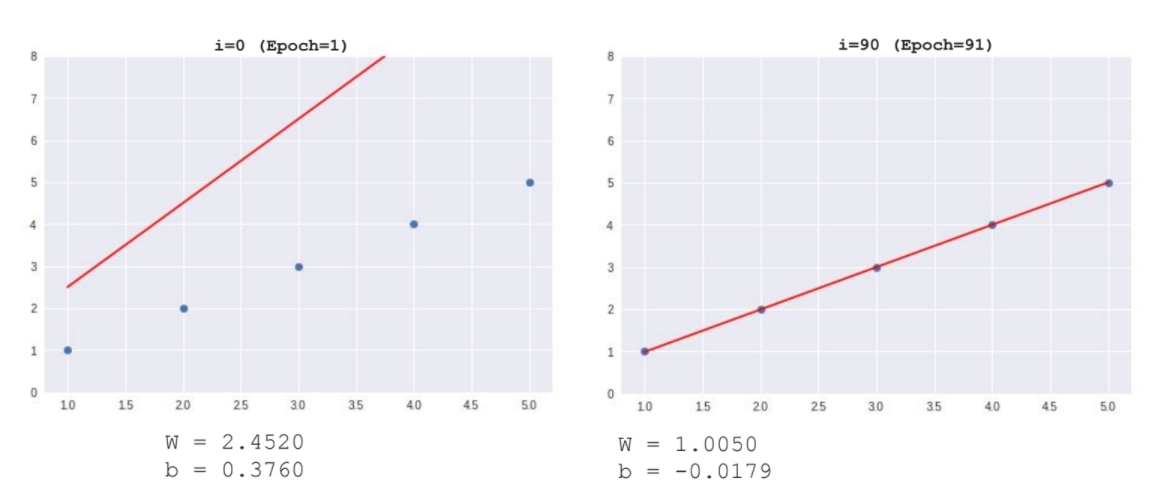

## 3. Predict

In [26]:
print(W * 5 + b)
print(W * 2.5 + b)

tf.Tensor(5.00667, shape=(), dtype=float32)
tf.Tensor(2.4946702, shape=(), dtype=float32)


In [4]:
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]

tf.model = tf.keras.Sequential()
# units == ouput shape, input_dim == input shape
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=1))

sgd = tf.keras.optimizers.SGD(lr=0.1)  # SGD == standard gradient descent, lr == learning rate
tf.model.compile(loss='mse', optimizer=sgd)  # mse == mean square error, 1/m * sig(y'-y)^2

# print summarty of the model
tf.model.summary()

# fit() excutes training
tf.model.fit(x_train, y_train, epochs=200)

# predict() returns predicted value
y_predict = tf.model.predict(np.array([5, 4]))
print(y_predict)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
1/1 [==============================] - 0s 4ms/step - loss: 6.4279
Epoch 2/200
1/1 [==============================] - 0s 3ms/step - loss: 3.0199
Epoch 3/200
1/1 [==============================] - 0s 4ms/step - loss: 1.4819
Epoch 4/200
1/1 [==============================] - 0s 4ms/step - loss: 0.7839
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 0.4635
Epoch 6/200
1/1 [==============================] - 0s 4ms/step - loss: 0.3131
Epoch 7/200
1/1 [==============================] - 0s 4ms/step - loss: 0.2394
Epoch 8/200
1/1 [==============================] - 0s 4ms/step - loss: 0.2005
Epoch 9/200
1/1 [=============

1/1 [==============================] - 0s 2ms/step - loss: 7.4780e-04
Epoch 99/200
1/1 [==============================] - 0s 4ms/step - loss: 7.0370e-04
Epoch 100/200
1/1 [==============================] - 0s 3ms/step - loss: 6.6219e-04
Epoch 101/200
1/1 [==============================] - 0s 4ms/step - loss: 6.2313e-04
Epoch 102/200
1/1 [==============================] - 0s 6ms/step - loss: 5.8638e-04
Epoch 103/200
1/1 [==============================] - 0s 2ms/step - loss: 5.5180e-04
Epoch 104/200
1/1 [==============================] - 0s 2ms/step - loss: 5.1925e-04
Epoch 105/200
1/1 [==============================] - 0s 2ms/step - loss: 4.8862e-04
Epoch 106/200
1/1 [==============================] - 0s 4ms/step - loss: 4.5980e-04
Epoch 107/200
1/1 [==============================] - 0s 3ms/step - loss: 4.3268e-04
Epoch 108/200
1/1 [==============================] - 0s 4ms/step - loss: 4.0716e-04
Epoch 109/200
1/1 [==============================] - 0s 4ms/step - loss: 3.8315e-04
Epoch 1

1/1 [==============================] - 0s 2ms/step - loss: 2.0550e-06
Epoch 196/200
1/1 [==============================] - 0s 2ms/step - loss: 1.9337e-06
Epoch 197/200
1/1 [==============================] - 0s 4ms/step - loss: 1.8196e-06
Epoch 198/200
1/1 [==============================] - 0s 3ms/step - loss: 1.7124e-06
Epoch 199/200
1/1 [==============================] - 0s 2ms/step - loss: 1.6114e-06
Epoch 200/200
1/1 [==============================] - 0s 3ms/step - loss: 1.5164e-06
[[-3.9979525]
 [-2.9989464]]
